# Import libraries

In [2]:
import os
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

# dataset load and preprocessing

In [3]:
dataset_dir = r"C:\Users\lakshita\Desktop\datasets\fraud_detection_dataset\data"
# Verify the dataset folder exists
if not os.path.exists(dataset_dir):
    raise FileNotFoundError(f"Dataset directory not found at: {dataset_dir}")

In [5]:
file_names= os.listdir(dataset_dir)
print(f"files found: {file_names}")

files found: ['2018-04-01.pkl', '2018-04-02.pkl', '2018-04-03.pkl', '2018-04-04.pkl', '2018-04-05.pkl', '2018-04-06.pkl', '2018-04-07.pkl', '2018-04-08.pkl', '2018-04-09.pkl', '2018-04-10.pkl', '2018-04-11.pkl', '2018-04-12.pkl', '2018-04-13.pkl', '2018-04-14.pkl', '2018-04-15.pkl', '2018-04-16.pkl', '2018-04-17.pkl', '2018-04-18.pkl', '2018-04-19.pkl', '2018-04-20.pkl', '2018-04-21.pkl', '2018-04-22.pkl', '2018-04-23.pkl', '2018-04-24.pkl', '2018-04-25.pkl', '2018-04-26.pkl', '2018-04-27.pkl', '2018-04-28.pkl', '2018-04-29.pkl', '2018-04-30.pkl', '2018-05-01.pkl', '2018-05-02.pkl', '2018-05-03.pkl', '2018-05-04.pkl', '2018-05-05.pkl', '2018-05-06.pkl', '2018-05-07.pkl', '2018-05-08.pkl', '2018-05-09.pkl', '2018-05-10.pkl', '2018-05-11.pkl', '2018-05-12.pkl', '2018-05-13.pkl', '2018-05-14.pkl', '2018-05-15.pkl', '2018-05-16.pkl', '2018-05-17.pkl', '2018-05-18.pkl', '2018-05-19.pkl', '2018-05-20.pkl', '2018-05-21.pkl', '2018-05-22.pkl', '2018-05-23.pkl', '2018-05-24.pkl', '2018-05-25.pk

In [6]:
import pandas as pd
import glob
import os

#Set your data folder path
folder_path = r"C:\Users\lakshita\Desktop\datasets\fraud_detection_dataset\data"

#Get list of all .pkl files in the folder
file_paths = glob.glob(os.path.join(folder_path, "*.pkl"))

#Load and combine all data
df = pd.concat([pd.read_pickle(file) for file in file_paths], ignore_index=True)

# Quick look
print("Total rows loaded:", len(df))
print("Columns:", df.columns)
print(df.head())

Total rows loaded: 1754155
Columns: Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO'],
      dtype='object')
   TRANSACTION_ID         TX_DATETIME CUSTOMER_ID TERMINAL_ID  TX_AMOUNT  \
0               0 2018-04-01 00:00:31         596        3156      57.16   
1               1 2018-04-01 00:02:10        4961        3412      81.51   
2               2 2018-04-01 00:07:56           2        1365     146.00   
3               3 2018-04-01 00:09:29        4128        8737      64.49   
4               4 2018-04-01 00:10:34         927        9906      50.99   

  TX_TIME_SECONDS TX_TIME_DAYS  TX_FRAUD  TX_FRAUD_SCENARIO  
0              31            0         0                  0  
1             130            0         0                  0  
2             476            0         0                  0  
3             569            0         0                  0  
4        

In [7]:
# Check for missing values
print(df.isnull().sum())

TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64


In [8]:
# Check data types
print(df.dtypes)

TRANSACTION_ID                int64
TX_DATETIME          datetime64[ns]
CUSTOMER_ID                  object
TERMINAL_ID                  object
TX_AMOUNT                   float64
TX_TIME_SECONDS              object
TX_TIME_DAYS                 object
TX_FRAUD                      int64
TX_FRAUD_SCENARIO             int64
dtype: object


In [9]:
# Check target value distribution
print(df['TX_FRAUD'].value_counts())

TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64


## { EDA } Expolatory data analysis

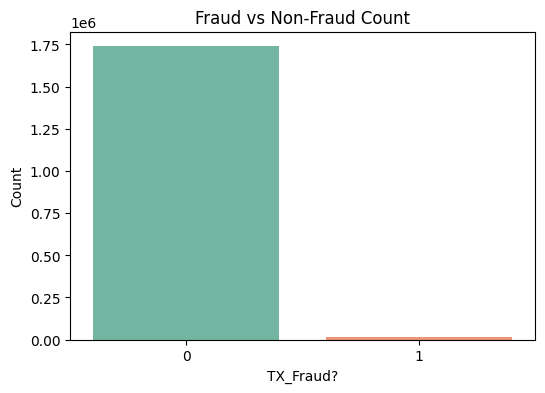

In [11]:
#Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='TX_FRAUD', palette='Set2')
plt.title("Fraud vs Non-Fraud Count")
plt.xlabel("TX_Fraud?")
plt.ylabel("Count")
plt.show()

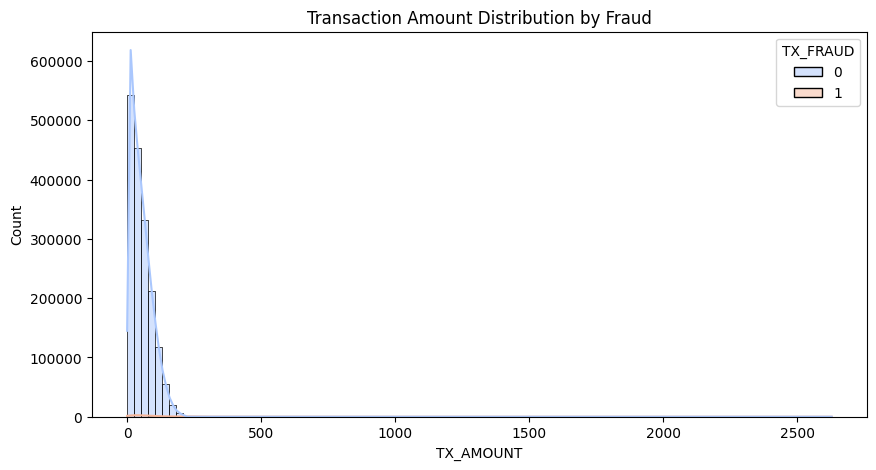

In [12]:
#Transaction Amount Distribution
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='TX_AMOUNT', hue='TX_FRAUD', kde=True, bins=100, palette='coolwarm')
plt.title("Transaction Amount Distribution by Fraud")
plt.show()

In [13]:
# Terminal & Customer frequency
top_terminals = df['TERMINAL_ID'].value_counts().head(10)
top_customers = df['CUSTOMER_ID'].value_counts().head(10)

print("\nTop 10 Terminals:\n", top_terminals)
print("\nTop 10 Customers:\n", top_customers)



Top 10 Terminals:
 TERMINAL_ID
4018    376
692     372
5295    368
8130    360
872     356
8670    354
7884    346
8606    338
2475    334
7798    333
Name: count, dtype: int64

Top 10 Customers:
 CUSTOMER_ID
382     767
3864    762
2891    761
775     754
1411    752
3651    752
149     749
2932    747
732     746
379     743
Name: count, dtype: int64


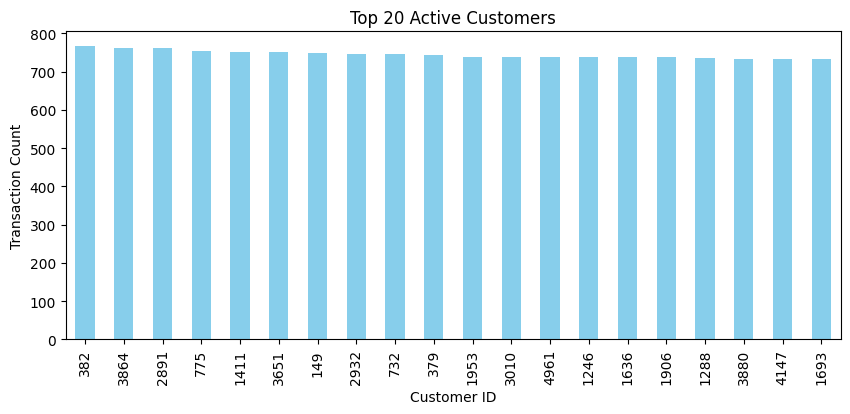

In [14]:
#Transactions per Customer
cust_txn_counts = df['CUSTOMER_ID'].value_counts().head(20)
plt.figure(figsize=(10,4))
cust_txn_counts.plot(kind='bar', color='skyblue')
plt.title("Top 20 Active Customers")
plt.xlabel("Customer ID")
plt.ylabel("Transaction Count")
plt.xticks(rotation=90)
plt.show()


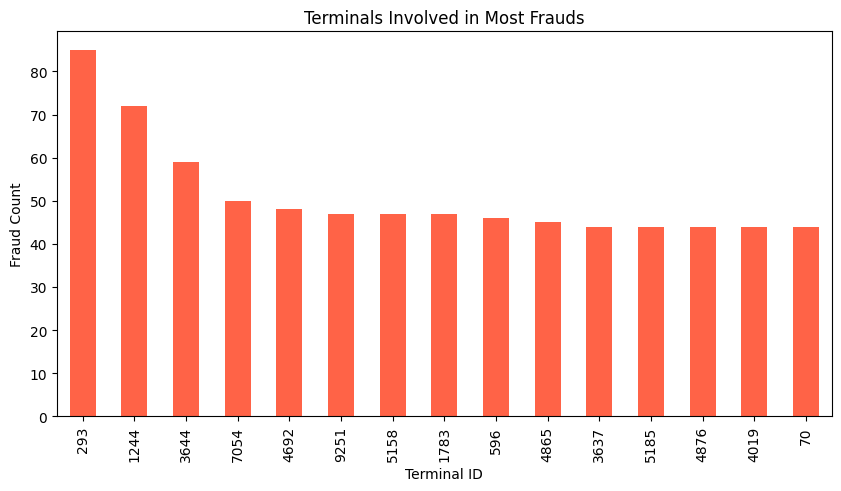

In [15]:
#Terminals with Most Frauds
fraud_by_terminal = df[df['TX_FRAUD'] == 1]['TERMINAL_ID'].value_counts().head(15)
plt.figure(figsize=(10,5))
fraud_by_terminal.plot(kind='bar', color='tomato')
plt.title("Terminals Involved in Most Frauds")
plt.xlabel("Terminal ID")
plt.ylabel("Fraud Count")
plt.xticks(rotation=90)
plt.show()

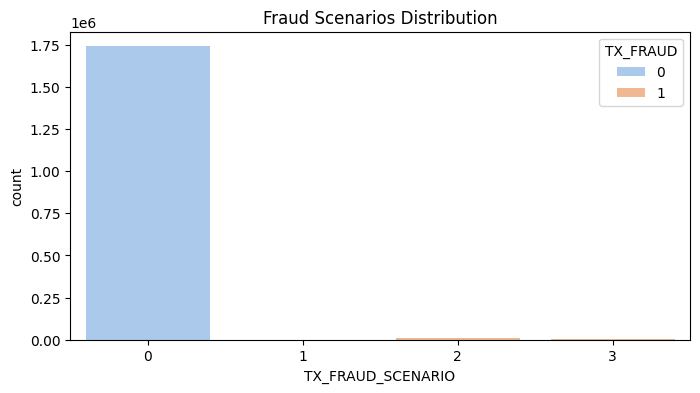

In [16]:
#Fraud scenarios
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='TX_FRAUD_SCENARIO', hue='TX_FRAUD', palette='pastel')
plt.title("Fraud Scenarios Distribution")
plt.show()

In [17]:
#Time-based Feature Engineering
if 'TX_DATETIME' in df.columns:
    df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])  # ensure it's datetime
    df['HOUR'] = df['TX_DATETIME'].dt.hour  # extract hour
    df['DAY'] = df['TX_DATETIME'].dt.day
    df['WEEKDAY'] = df['TX_DATETIME'].dt.dayofweek  # 0 = Monday

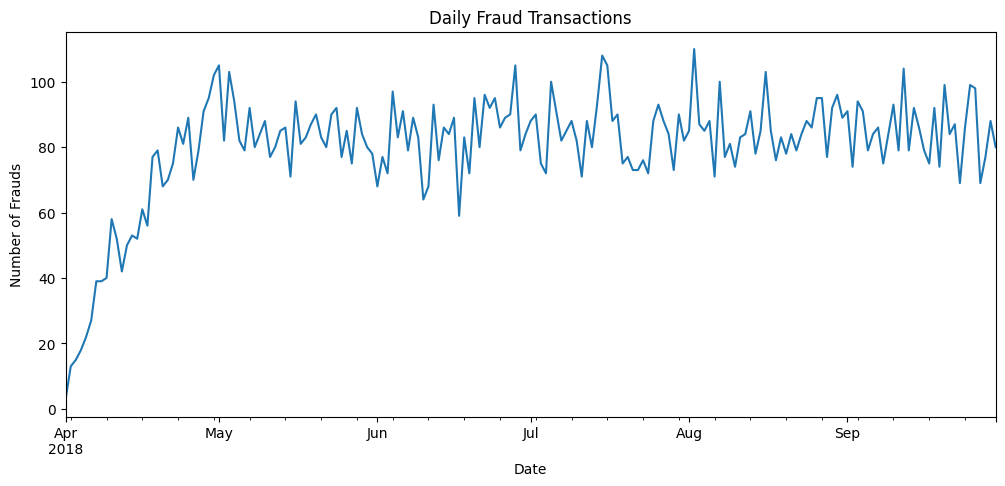

In [18]:
# Fraud over Time (Optional if TX_DATETIME exists)
if 'TX_DATETIME' in df.columns:
    df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
    df.set_index('TX_DATETIME', inplace=True)
    df['TX_FRAUD'].resample('D').sum().plot(figsize=(12,5), title='Daily Fraud Transactions')
    plt.xlabel("Date")
    plt.ylabel("Number of Frauds")
    plt.show()

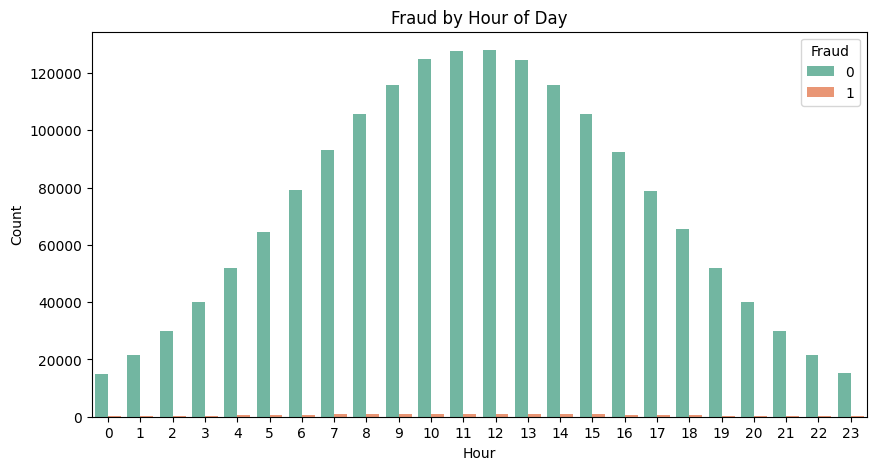

In [19]:
#Fraud by Hour of Day
plt.figure(figsize=(10,5))
sns.countplot(x='HOUR', data=df, hue='TX_FRAUD', palette='Set2')
plt.title("Fraud by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend(title="Fraud")
plt.show()

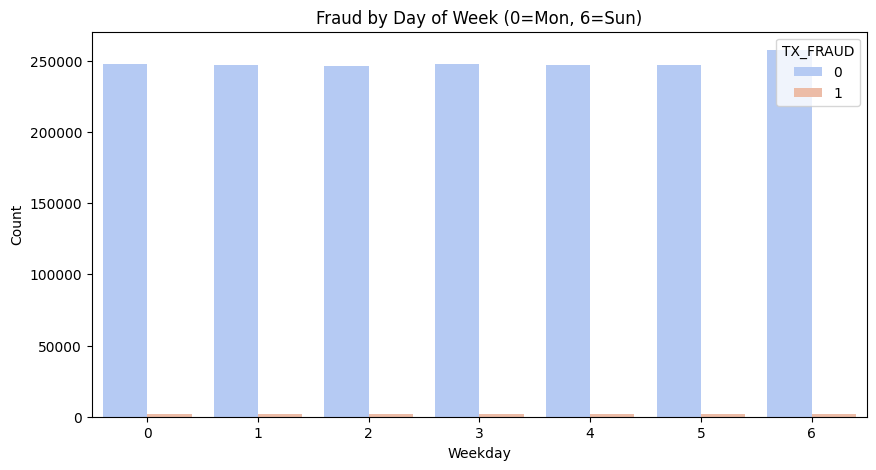

In [20]:
#Fraud by Day of Week
plt.figure(figsize=(10,5))
sns.countplot(x='WEEKDAY', data=df, hue='TX_FRAUD', palette='coolwarm')
plt.title("Fraud by Day of Week (0=Mon, 6=Sun)")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.show()

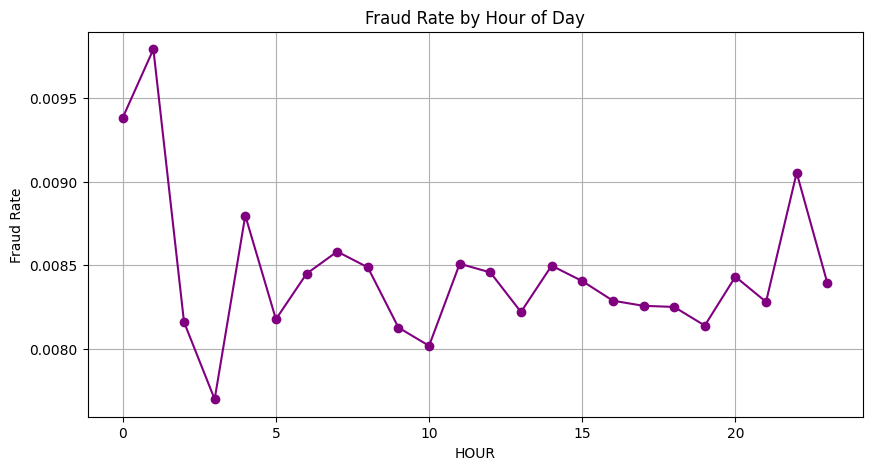

In [21]:
#Fraud Ratio by Hour
fraud_ratio_by_hour = df.groupby('HOUR')['TX_FRAUD'].mean()
plt.figure(figsize=(10,5))
fraud_ratio_by_hour.plot(kind='line', marker='o', color='purple')
plt.title("Fraud Rate by Hour of Day")
plt.ylabel("Fraud Rate")
plt.grid(True)
plt.show()

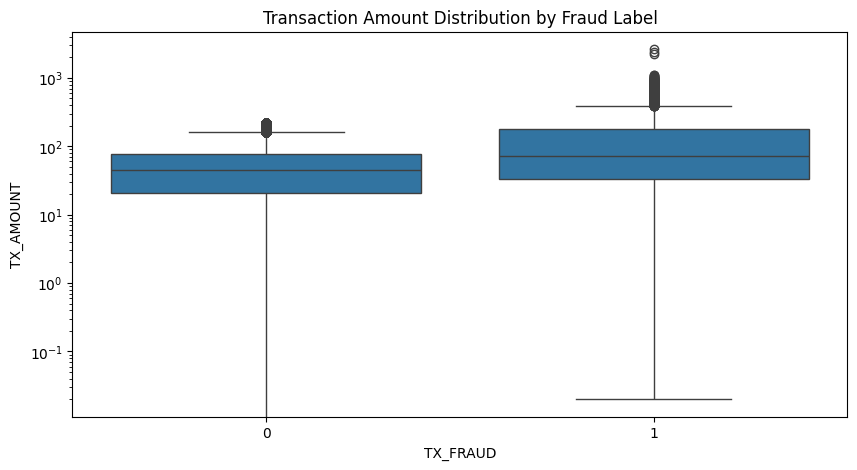

In [22]:
#Fraud Amount Distribution
plt.figure(figsize=(10,5))
sns.boxplot(x='TX_FRAUD', y='TX_AMOUNT', data=df)
plt.yscale('log')  # Use log scale if amounts vary a lot
plt.title("Transaction Amount Distribution by Fraud Label")
plt.show()

# Label Encoder

In [24]:
le_customer = LabelEncoder()
le_terminal = LabelEncoder()

df['CUSTOMER_ID_ENC'] = le_customer.fit_transform(df['CUSTOMER_ID'])
df['TERMINAL_ID_ENC'] = le_terminal.fit_transform(df['TERMINAL_ID'])


In [25]:
# Count of transactions per customer
df['CUSTOMER_TX_COUNT'] = df.groupby('CUSTOMER_ID')['TX_AMOUNT'].transform('count')


In [26]:
#Separate X and y
X = df.drop('TX_FRAUD', axis=1)
y = df['TX_FRAUD']

In [27]:
#Encode categorical columns (if any)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Correlation Heatmap

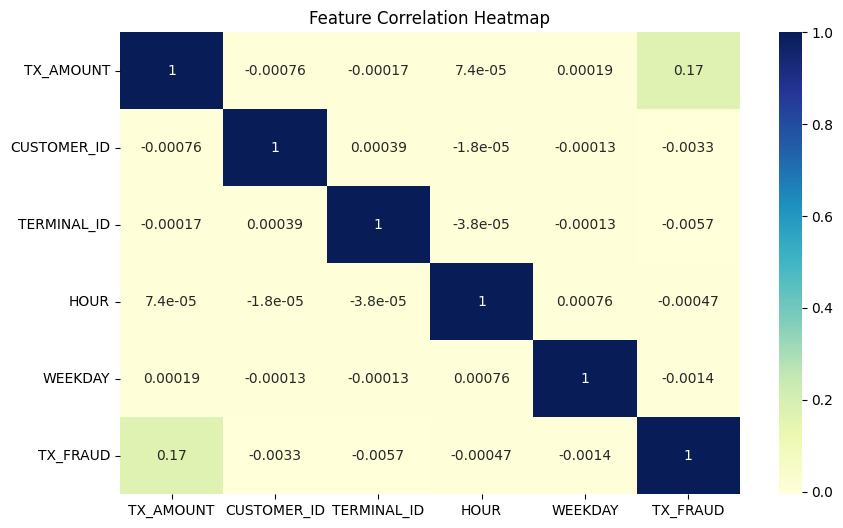

In [29]:
df_encoded = df.copy()
df_encoded['CUSTOMER_ID'] = df_encoded['CUSTOMER_ID'].astype('category').cat.codes
df_encoded['TERMINAL_ID'] = df_encoded['TERMINAL_ID'].astype('category').cat.codes

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded[['TX_AMOUNT', 'CUSTOMER_ID', 'TERMINAL_ID', 'HOUR', 'WEEKDAY', 'TX_FRAUD']].corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()

# Train-test split

In [31]:
y = df['TX_FRAUD']
X = df.drop(['TX_FRAUD', 'TX_FRAUD_SCENARIO'], axis=1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify to balance fraud classes
)


In [32]:
scaler = StandardScaler()
# Fit scaler on training data only
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))

# ML Model Implementation

## 1. LogisticRegression

In [35]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [36]:
y_pred_logreg = logreg.predict(X_test_scaled)

In [37]:
print(" Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

 Logistic Regression
Accuracy: 0.9924664582092232
Confusion Matrix:
 [[347895      0]
 [  2643    293]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    347895
           1       1.00      0.10      0.18      2936

    accuracy                           0.99    350831
   macro avg       1.00      0.55      0.59    350831
weighted avg       0.99      0.99      0.99    350831



## 2. Decision Tree

In [39]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred_dtree = dtree.predict(X_test)

In [41]:
print(" Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))
print("Classification Report:\n", classification_report(y_test, y_pred_dtree))

 Decision Tree
Accuracy: 0.9932674136550077
Confusion Matrix:
 [[346686   1209]
 [  1153   1783]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    347895
           1       0.60      0.61      0.60      2936

    accuracy                           0.99    350831
   macro avg       0.80      0.80      0.80    350831
weighted avg       0.99      0.99      0.99    350831



## 3. K-Nearest Neighbors (KNN)

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [44]:
y_pred_knn = knn.predict(X_test_scaled)

In [45]:
print(" KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

 KNN
Accuracy: 0.9933985309165951
Confusion Matrix:
 [[347869     26]
 [  2290    646]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    347895
           1       0.96      0.22      0.36      2936

    accuracy                           0.99    350831
   macro avg       0.98      0.61      0.68    350831
weighted avg       0.99      0.99      0.99    350831



# Confusion Matrix

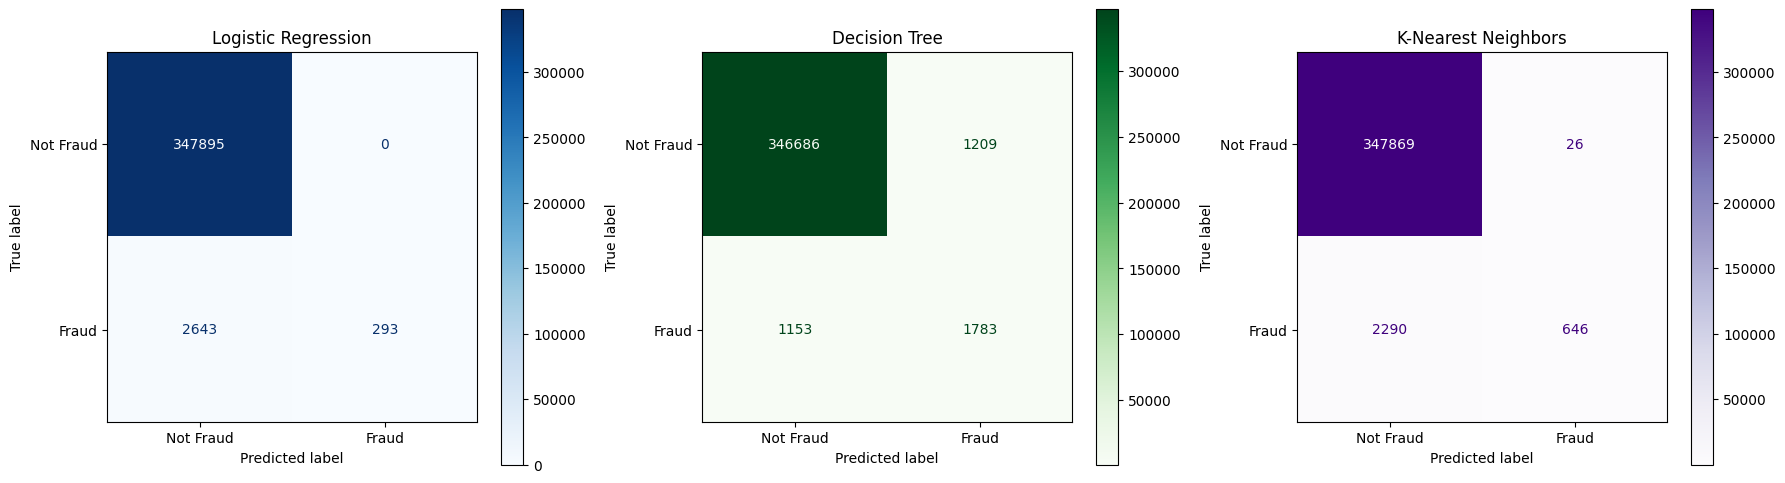

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create subplots for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(cm_logreg, display_labels=["Not Fraud", "Fraud"]).plot(ax=axes[0], cmap="Blues")
axes[0].set_title("Logistic Regression")

# Decision Tree
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
ConfusionMatrixDisplay(cm_dtree, display_labels=["Not Fraud", "Fraud"]).plot(ax=axes[1], cmap="Greens")
axes[1].set_title("Decision Tree")

# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn, display_labels=["Not Fraud", "Fraud"]).plot(ax=axes[2], cmap="Purples")
axes[2].set_title("K-Nearest Neighbors")

# Adjust layout
plt.tight_layout()
plt.show()
